### Neural Networks - Keras

Neural network studies began to map the human brain and understand decision-making, but the algorithm aims to eliminate human emotions from trading.

- Input Layer: Collects the information.
- Hidden Layers: Two or more layers process the inputs.
- Output Layer: Generates decisions or actions based on processed inputs.
This model offers a simplified view of the complex decision-making processes in the human brain.

Most common types of neural networks (neural network trading):

- Perceptron
- Feed forward neural networks
- Multilayer perceptron
- Convolutional neural network
- Recurrent neural network
- Modular neural network

Sources:
- https://blog.quantinsti.com/neural-network-python/
- https://github.com/kaumaron/Data_Science/blob/fac4e4177a11fb2aab59895eaadbe37a104b045d/Deep_Learning/Stock%20Analysis/ANN-Stock-Prediction-Python-Code_Reliance/ANN_stock_prediction.py

#### How to train a neural network?

We'll train a neural network to predict stock prices using historical OHLCV (Open, High, Low, Close, Volume) data. Here’s an overview of the process:

1. Training Approaches:
 - Rule-Based: Define rules for outputs based on inputs.
 - Model Training: Adjust weights on a dataset to improve predictions.
2. Dataset Structure:
 - Inputs: OHLCV data.
 - Output: Next day’s Close price (actual y and predicted y').
3. Cost Function:
 - Measures prediction error:
  $$ C = \sum_{}^{}\frac{1}{2}(\widehat{y}-y)^{2} $$
 - Objective: Minimize this cost.
4. Training Process:
 - Compute initial cost with a set of weights.
 - Adjust weights using backpropagation to reduce the cost iteratively.
5. Optimization:
 - Evaluate cost across multiple weight configurations to find the best ones.

By refining weights based on error, the neural network learns to predict stock prices effectively.

[*********************100%***********************]  1 of 1 completed
c:\Users\santi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training data shape: (1437, 9) (1437,)
Testing data shape: (360, 9) (360,)
Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5486 - loss: 0.6924
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5398 - loss: 0.6898
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5391 - loss: 0.6896
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5143 - loss: 0.6906
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5384 - loss: 0.6891
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5275 - loss: 0.6897
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5519 - loss: 0.6883
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5435 - loss: 0.6899
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5508 - loss: 0.6856
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5579 - loss: 0.6863
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

C:\Users\santi\AppData\Local\Temp\ipykernel_9380\1475291286.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True  True  True  True  True  True  True  True False False  True  True
 False False  True False False  True  True  True  True  True False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
 False  True False  True False  True  True  True  True  True False False
  True False False  True  True  True  True False  True  True False False
 False False  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True False False  True False False False
 False  True False  True  True  True  True False  True  True False False
  True  True  True  True  True  True  True  True  True  True  True False
 

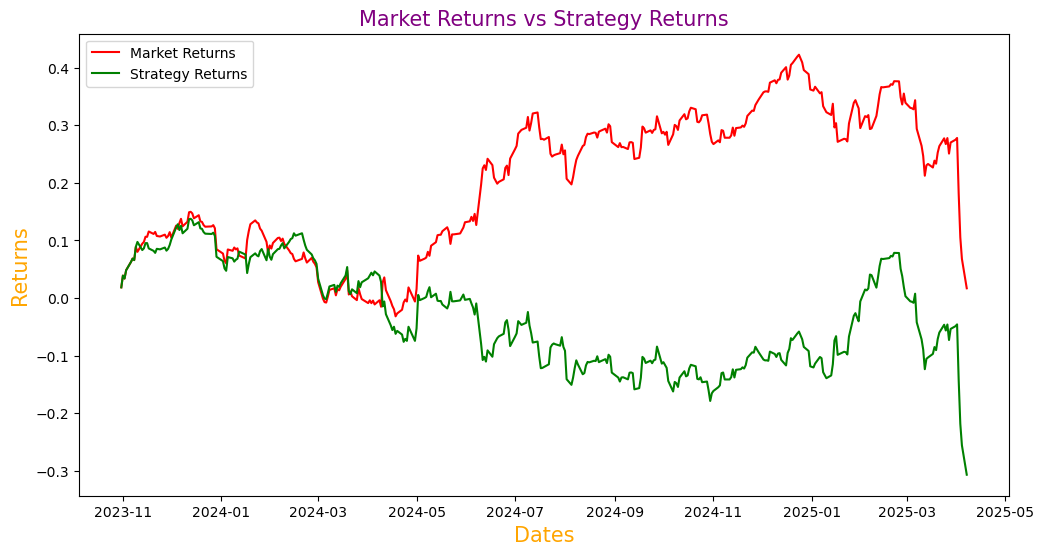

In [53]:
# Ta-lib is a technical analysis library, which will be used to compute the RSI and Williams %R. 
# These will be used as features in order to train our artificial neural network or ANN.
# Instructions for the Installation: https://blog.quantinsti.com/install-ta-lib-python/
# https://github.com/cgohlke/talib-build/releases -> Install ta_lib-0.6.3-cp313-cp313-win_amd64.whl On Windows win_amd64

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import random
import talib
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Ensure reproducibility
random.seed(42)
np.random.seed(42)

# Download stock data
price_stock = yf.download('AAPL', start='2018-01-01', end='2025-04-09', auto_adjust=True)

# Check if data is downloaded successfully
if price_stock.empty:
    print("Error: No data downloaded. Please check the ticker symbol or internet connection.")
else:
    # Preparing the dataset - Inputs
    price_stock['H-L'] = price_stock['High'] - price_stock['Low']
    price_stock['O-C'] = price_stock['Close'] - price_stock['Open']
    price_stock['3day MA'] = price_stock['Close'].shift(1).rolling(window=3).mean()
    price_stock['10day MA'] = price_stock['Close'].shift(1).rolling(window=10).mean()
    price_stock['30day MA'] = price_stock['Close'].shift(1).rolling(window=30).mean()
    price_stock['Std_Dev'] = price_stock['Close'].rolling(5).std()
    price_stock['RSI'] = talib.RSI(price_stock['Close'].values.flatten(), timeperiod=9)
    price_stock['Williams %R'] = talib.WILLR(
        price_stock['High'].values.flatten(),
        price_stock['Low'].values.flatten(),
        price_stock['Close'].values.flatten(),
        7
    )

    # Output Values - Price Rise or Fall
    price_stock['Price_Rise'] = np.where(price_stock['Close'].shift(-1) > price_stock['Close'], 1, 0)

    # Drop rows with NaN values
    price_stock = price_stock.dropna()

    # Check if the dataset is not empty after preprocessing
    if price_stock.empty:
        print("Error: Dataset is empty after preprocessing. Please check the feature engineering steps.")
    else:
        # Define input features (X) and target variable (y)
        X = price_stock.iloc[:, 4:-1]
        y = price_stock.iloc[:, -1]

        # Split the dataset into training and testing sets
        split = int(0.8 * len(X))
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Check if training data is not empty
        if X_train.empty or y_train.empty:
            print("Error: Training data is empty. Please check the data splitting logic.")
        else:
            # Standardize the input features
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            # Print shapes of the datasets
            print("Training data shape:", X_train.shape, y_train.shape)
            print("Testing data shape:", X_test.shape, y_test.shape)

            # Building the ANN
            classifier = Sequential()
            classifier.add(Dense(units=128, kernel_initializer='uniform', activation='relu', input_dim=X.shape[1]))
            classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Train the ANN
            classifier.fit(X_train, y_train, batch_size=10, epochs=100)

            # Predicting the Movement of the Stock Price
            y_pred = classifier.predict(X_test)
            y_pred = (y_pred > 0.5)

            # Add predictions to the dataset
            price_stock['y_pred'] = np.nan
            price_stock.iloc[(len(price_stock) - len(y_pred)):, -1] = y_pred.flatten()

            # Drop rows with NaN values for returns calculation
            trade_price_stock = price_stock.dropna()

            # Computing Tomorrow Returns
            trade_price_stock['Tomorrow_Returns'] = np.log(trade_price_stock['Close'] / trade_price_stock['Close'].shift(1))
            trade_price_stock['Tomorrow_Returns'] = trade_price_stock['Tomorrow_Returns'].shift(-1)

            # Compute the Strategy returns
            trade_price_stock['Strategy_Returns'] = np.where(
                trade_price_stock['y_pred'] == 1,
                trade_price_stock['Tomorrow_Returns'],
                -trade_price_stock['Tomorrow_Returns']
            )

            # Compute the Cumulative Returns
            trade_price_stock['Cumulative_Market_Returns'] = trade_price_stock['Tomorrow_Returns'].cumsum()
            trade_price_stock['Cumulative_Strategy_Returns'] = trade_price_stock['Strategy_Returns'].cumsum()

            # Plot the results
            plt.figure(figsize=(12, 6))
            plt.plot(trade_price_stock['Cumulative_Market_Returns'], color='red', label='Market Returns')
            plt.plot(trade_price_stock['Cumulative_Strategy_Returns'], color='green', label='Strategy Returns')
            plt.title('Market Returns vs Strategy Returns', color='purple', size=15)
            plt.xlabel('Dates', color='orange', fontsize=15)
            plt.ylabel('Returns', color='orange', fontsize=15)
            plt.legend()
            plt.show()

In [54]:
# Predicting the Movement of the Stock Price
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Add predictions to the dataset
price_stock['y_pred'] = np.nan
price_stock.iloc[(len(price_stock) - len(y_pred)):, -1] = y_pred.flatten()

# Drop rows with NaN values for returns calculation
trade_price_stock = price_stock.dropna()

# Compute Tomorrow Returns
trade_price_stock['Tomorrow_Returns'] = np.log(trade_price_stock['Close'] / trade_price_stock['Close'].shift(1))
trade_price_stock['Tomorrow_Returns'] = trade_price_stock['Tomorrow_Returns'].shift(-1)

# Display tomorrow's stock price predictions
print("Tomorrow's stock price predictions (1 = Price Rise, 0 = Price Fall):")
print(trade_price_stock['y_pred'].tail())

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tomorrow's stock price predictions (1 = Price Rise, 0 = Price Fall):
Date
2025-04-02    True
2025-04-03    True
2025-04-04    True
2025-04-07    True
2025-04-08    True
Name: y_pred, dtype: object


C:\Users\santi\AppData\Local\Temp\ipykernel_9380\1101994585.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True  True  True  True  True  True  True  True False False  True  True
 False False  True False False  True  True  True  True  True False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
 False  True False  True False  True  True  True  True  True False False
  True False False  True  True  True  True False  True  True False False
 False False  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True False False  True False False False
 False  True False  True  True  True  True False  True  True False False
  True  True  True  True  True  True  True  True  True  True  True False
 F